Sampling Frequency: 48000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 154560


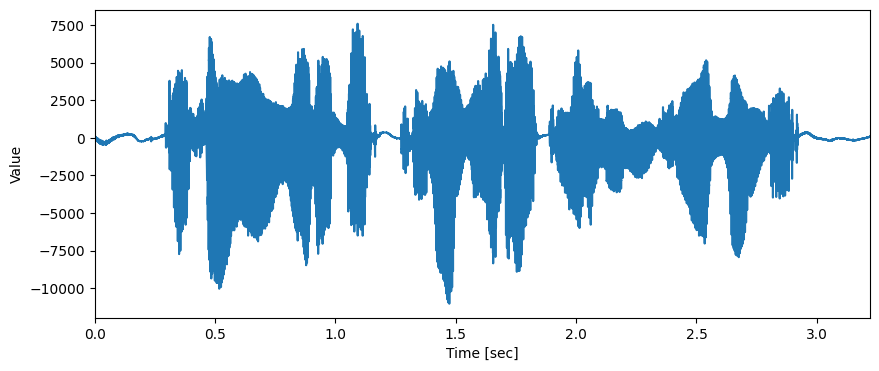

In [3]:
# plot_wave.py : 파일을 열어서 파형을 시각화한다.

# wav 데이터 읽기
import wave

# !pip install numpy

# 수치 연산용
import numpy as np

# !pip install matplotlib --quiet
# 시각화
import matplotlib.pyplot as plt

if __name__ == "__main__":
  # wav 파일 열기
  wav_file = './speech_recognition/data/original/jsut_ver1.1/basic5000/wav/BASIC5000_0228.wav'
  # 파형을 출력하는 파일(png 파일)
  out_plot = './speech_recognition/plot.png'

  # wav 파일을 열고 이후 처리를 진행
  with wave.open(wav_file) as wav:
  # 샘플링 주파수[Hz] 확인, 주파수는 전파나 음파가 1초 동안 진동하는 횟수, 해당 wav 파일은 1초동안 44100의 음압치를 기록한다
    sampling_frequency = wav.getframerate()
    # 샘플링 사이즈[Byte] 확인
    sampling_size = wav.getsampwidth()
    # 채널 수(마이크 수) 확인
    num_channels = wav.getnchannels()
    # wav 데이터 샘플 수 확인
    num_samples = wav.getnframes()
    # wav 데이터 읽기
    waveform = wav.readframes(num_samples)
    # 읽어들인 데이터는 바이너리 값(16bit integer)이므로 정수로 변환한다
    waveform = np.frombuffer(waveform, dtype=np.int16)
  # 읽어온 wav파일의 정보 표시하기
  print("Sampling Frequency: %d [Hz]" % sampling_frequency)
  # 44100
  print("Sample Size: %d [Byte]" % sampling_size)
  # 2byte
  print("Number of Channels: %d" % num_channels)
  # 1
  print("Number of Samples: %d" % num_samples)
  # 51040

  # 횡축(가로축, 시간축) 생성
  time_axis = np.arange(num_samples) /  sampling_frequency
  # 시각화 영역 생성
  plt.figure(figsize=(10,4))
  # 파형 그리기
  plt.plot(time_axis, waveform)
  # 횡축과 종축(세로축) 라벨값 정의
  plt.xlabel("Time [sec]")
  plt.ylabel("Value")
  # 횡축 표시 영역을 0에서 파형 종료 시각으로 제한
  plt.xlim([0, num_samples / sampling_frequency])
 
  
  plt.savefig(out_plot)

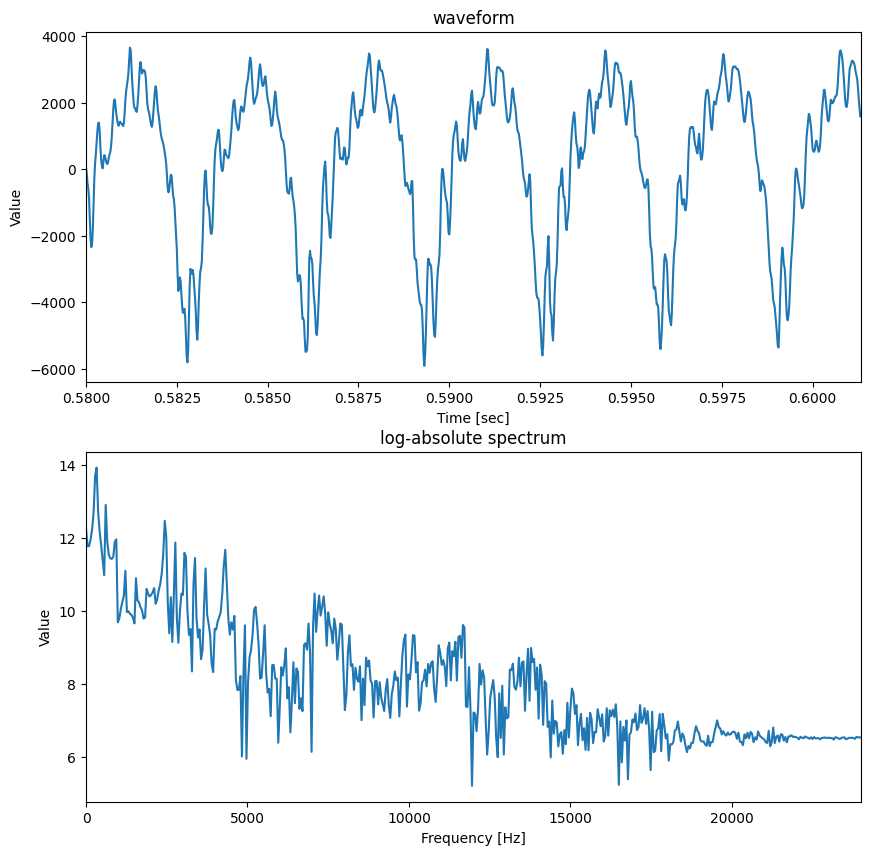

In [7]:
# test_fft.py : wav 파일의 특정 시각 파형을 푸리에 변환하여 로그 진폭 스펙트럼을 표시

import wave
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
  # wav 파일 열기
  wav_file = './speech_recognition/data/original/jsut_ver1.1/basic5000/wav/BASIC5000_0228.wav'

  # 분석 시각. BASIC5000_0001.wav에서는 아래 시각에 음소 'o'을 발화
  target_time = 0.58

  # FFT(고속 푸리에 변화)한 범위의 샘플 수, 2의 제곱수여야 한다
  fft_size = 1024

  # 시각화 결과 파일 (png파일)
  out_plot = './speech_recognition/spectrum.png'

  # wav 파일을 열고 아래 코드들을 수행
  with wave.open(wav_file) as wav:
    # 샘플링 주파수 [Hz] 확인
    sampling_frequency = wav.getframerate()
    # wav 데이터 읽기
    waveform = wav.readframes(wav.getnframes())
    # 읽어온 데이터는 바이너리 값(16bit integer)이므로 수치(정수)로 변환
    waveform = np.frombuffer(waveform, dtype=np.int16)

  # 분석 시각을 샘플 번호로 변환
  target_index = np.int32(target_time * sampling_frequency)
  # FFT를 실행하는 구간만큼의 파형 데이터를 도출
  frame = waveform[target_index: target_index + fft_size]
  # FFT 적용
  spectrum = np.fft.fft(frame)
  # 진폭(위아래) 스펙트럼 확인
  absolute = np.abs(spectrum)
  # 진폭 스펙트럼은 좌우 대칭이므로 좌측 반만 이용
  absolute = absolute[:np.int32(fft_size / 2) + 1]
  # 로그 함수를 취하고 로그 진폭 스펙트럼 계산(1E-7를 더해 진폭이 0인 경우 값이 마이너스 무한대가 되는 것을 방지)
  log_absolute = np.log(absolute + 1E-7)

  # 시간 파형과 로그 진폭 스펙트럼을 시각화
  plt.figure(figsize=(10, 10))
  # 그림 영역을 종으로 2분활하여 위쪽에 시간 파형 표시
  plt.subplot(2, 1, 1)

  # 횡축(시간축) 생성
  time_axis = target_time \
              + np.arange(fft_size) / sampling_frequency

  # 파형 그리기
  plt.plot(time_axis, frame)

  # 시각화한 그림의 제목과 횡축, 종축 라벨 정의
  plt.title('waveform')
  plt.xlabel('Time [sec]')
  plt.ylabel('Value')

  # 횡축의 표시 영역을 분석 구간의 시각으로 제한
  plt.xlim([target_time,
            target_time + fft_size / sampling_frequency])

  # 2분할한 그림 영역 밑에 로그 진폭 스펙트럼을 표시
  plt.subplot(2, 1, 2)
  # 횡축(주파수 축) 생성
  freq_axis = np.arange(np.int32(fft_size / 2) + 1) \
              * sampling_frequency / fft_size
  # 로그 진폭 스펙트럼 시각화
  plt.plot(freq_axis, log_absolute)
  # 시각화한 그림의 제목과 횡축, 종축 라벨 정의
  plt.title('log-absolute spectrum')
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Value')
  # 횡축 표시 영역을 0 ~ 최대 주파수로 제한
  plt.xlim([0, sampling_frequency / 2])

  # 시각화된 결과물 저장
  plt.savefig('out_plot')

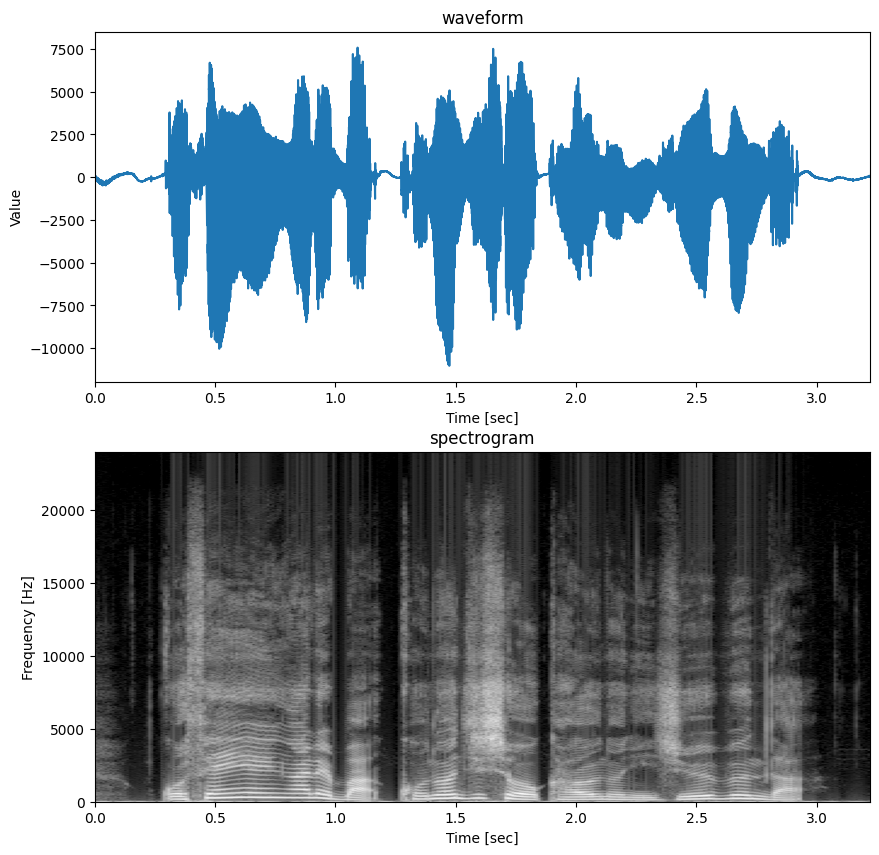

In [10]:
# test_spectrogram.py : 단시간 푸리에 변환을 이용하여 음성 스펙트로그램 생성

import wave
import numpy as np
import matplotlib.pyplot as plt


if __name__ == "__main__":
  # wav 파일 열기
  # wave_file = '../data/wav/BASIC5000_0001.wav'
  wave_file = './speech_recognition/data/original/jsut_ver1.1/basic5000/wav/BASIC5000_0228.wav'
  # 프레임 사이즈 [milli sec = ms]
  frame_size = 25
  # 프레임 시프트 [milli sec = ms]
  frame_shift = 10

  # 시각화 결과 파일(png파일)
  out_plot = './spectrogram.png'

  # wav 데이터 읽기
  with wave.open(wave_file) as wav:
    sample_frequency = wav.getframerate()
    num_samples = wav.getnframes()
    waveform = wav.readframes(num_samples)
    waveform = np.frombuffer(waveform, dtype=np.int16)

  # 프레임 사이즈를 ms에서 샘플 수로 변환
  # 44100[hz]*25[ms]*0.001
  frame_size = int(sample_frequency \
                   * frame_size * 0.001)
  #
  # 프레임 시프트를 ms에서 샘플 수로 변환
  frame_shift = int(sample_frequency * frame_shift * 0.001)

  # FFT를 적용할 범위의 샘플 수를 프레임 사이즈보다 큰 2제곱으로 설정
  fft_size = 1
  while fft_size < frame_size:
    fft_size *= 2

  # 단시간 푸리에 변환을 했을 때의 총 프레임 수를 계산
  num_frames = (num_samples - frame_size) // frame_shift + 1

  # 스펙트로그램 행렬 준비
  spectrogram = np.zeros((num_frames, int(fft_size / 2) + 1))

  # 프레임별 진폭 스펙트럼 계산
  for frame_idx in range(num_frames):
    # 분석 시작 위치는 프레임 번호(0 시작) * (프레임 시프트)
    start_index = frame_idx * frame_shift
    # 1프레임만큼 파형 추출
    frame = waveform[start_index: \
                     start_index + frame_size].copy()
    # 해밍 창 함수 적용
    frame = frame * np.hamming(frame_size)
    # 로그 진폭 스펙트럼 계산, n 설정으로 데이터 개수가 400인 프레임 데이터에 대해 512가 될 때까지 뒷부분에 0을 더함
    spectrum = np.fft.fft(frame, n=fft_size)
    absolute = np.abs(spectrum)
    absolute = absolute[:int(fft_size / 2) + 1]
    log_absolute = np.log(absolute + 1E-7)
    # 계산 결과를 스펙트로그램으로 저장
    spectrogram[frame_idx, :] = log_absolute

  # 시간 파형과 스펙트로그램 시각화
  # 시각화 영역 작성
  plt.figure(figsize=(10, 10))
  # 시각화 영역을 세로로 2분할하여 위쪽에 시간 파형 표시
  plt.subplot(2, 1, 1)

  # 횡축(시간축) 생성
  time_axis = np.arange(num_samples) / sample_frequency

  # 파형 그리기
  plt.plot(time_axis, waveform)

  # 시각화한 그림의 제목과 횡축, 종축 라벨 정의
  plt.title('waveform')
  plt.xlabel('Time [sec]')
  plt.ylabel('Value')

  # 횡축의 표시 영역을 0 ~ 파형 끝까지 설정
  plt.xlim([0, num_samples / sample_frequency])

  # 2분할한 시각화 영역의 하단에 스펙트로그램을 표시
  plt.subplot(2, 1, 2)
  # 스펙트록램의 최대치를 0에 맞춰 color map 범위 조정
  spectrogram -= np.max(spectrogram)
  vmax = np.abs(np.min(spectrogram)) * 0.0
  vmin = - np.abs(np.min(spectrogram)) * 0.7
  # 히스토그램 시각화
  # x(주파수),y(시간)인 축을 뒤바꾼 후 상하 반전하기
  plt.imshow(spectrogram.T[-1::-1, :],
             extent=[0, num_samples / sample_frequency,
                     0, sample_frequency / 2],
             cmap='gray',
             vmax=vmax,
             vmin=vmin,
             aspect='auto')
  # 그림 제목, x축과 y축 라벨 정의
  plt.title('spectrogram')
  plt.xlabel('Time [sec]')
  plt.ylabel('Frequency [Hz]')
  # 시각화 결과를 저장
  plt.savefig(out_plot)